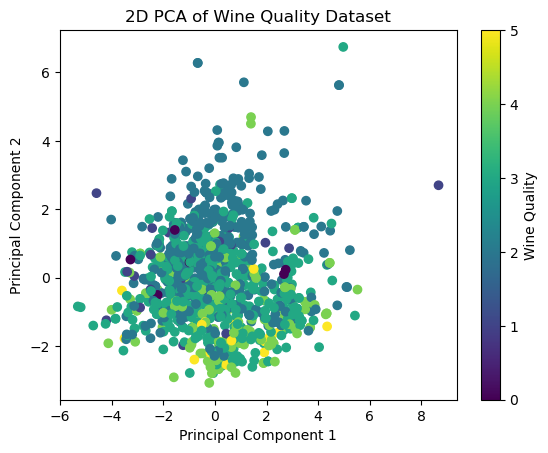

Cumulative Explained Variance by PCA:
[0.28692345 0.45767448 0.60073377 0.71087056 0.79798089 0.85846899
 0.90915967]
Epoch 1/55
23/23 [==============================] - 18s 797ms/step - loss: 1.6657 - accuracy: 0.3803 - val_loss: 1.5441 - val_accuracy: 0.4208
Epoch 2/55
23/23 [==============================] - 0s 6ms/step - loss: 1.4060 - accuracy: 0.4911 - val_loss: 1.2977 - val_accuracy: 0.4317
Epoch 3/55
23/23 [==============================] - 0s 6ms/step - loss: 1.2030 - accuracy: 0.5253 - val_loss: 1.1530 - val_accuracy: 0.5464
Epoch 4/55
23/23 [==============================] - 0s 6ms/step - loss: 1.0989 - accuracy: 0.5923 - val_loss: 1.0907 - val_accuracy: 0.5464
Epoch 5/55
23/23 [==============================] - 0s 7ms/step - loss: 1.0458 - accuracy: 0.5951 - val_loss: 1.0546 - val_accuracy: 0.5464
Epoch 6/55
23/23 [==============================] - 0s 6ms/step - loss: 1.0144 - accuracy: 0.6047 - val_loss: 1.0487 - val_accuracy: 0.5191
Epoch 7/55
23/23 [=====================

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the dataset and preprocess it (same as before)
df = pd.read_csv("WineQT.csv")
df.drop(columns=["Id"], inplace=True)

# Separate features (X) and target (y)
X = df.drop(columns=["quality"])
y = df["quality"]

# Map target labels to [0, num_classes - 1]
unique_classes = y.unique()
num_classes = len(unique_classes)
label_mapping = {label: idx for idx, label in enumerate(sorted(unique_classes))}
y_mapped = y.map(label_mapping)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA to visualize the 2D plot
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Visualize the 2D PCA plot
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_mapped, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Wine Quality Dataset')
plt.colorbar(label='Wine Quality')
plt.show()

# Step 3: Apply PCA to retain 90% variance (7 components)
pca_7d = PCA(n_components=7)
X_pca_7d = pca_7d.fit_transform(X_scaled)

# Check cumulative explained variance
explained_variance = pca_7d.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance by PCA:")
print(explained_variance)

# Step 4: Split the 7-component PCA dataset into training and test sets
X_train_pca_7d, X_test_pca_7d, y_train_pca_7d, y_test_pca_7d = train_test_split(X_pca_7d, y_mapped, test_size=0.2, random_state=42)

# Step 5: Train the neural network on the 7-component PCA dataset
model_pca_7d = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),  # Input shape matches the number of components
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_pca_7d.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_pca_7d = model_pca_7d.fit(
    X_train_pca_7d, y_train_pca_7d, 
    epochs=55, batch_size=32, 
    validation_split=0.2, verbose=1
)

# Step 6: Evaluate the model on the 7-component PCA dataset
y_pred_pca_7d = model_pca_7d.predict(X_test_pca_7d)
y_pred_pca_7d = tf.argmax(y_pred_pca_7d, axis=1)

# Print metrics
print("Classification Report for PCA-Reduced Dataset (7 Components):")
print(classification_report(y_test_pca_7d, y_pred_pca_7d))
print(f"Accuracy on PCA-Reduced Dataset (7 Components): {accuracy_score(y_test_pca_7d, y_pred_pca_7d):.4f}")


### **Answer to Question 15**

#### **Observations**
1. **Cumulative Explained Variance**:
   - The first 7 principal components retain **90.92%** of the variance in the dataset, which is sufficient for training the model while reducing dimensionality.

2. **Model Training**:
   - The model was trained for **55 epochs** on the PCA-reduced dataset (7 components).
   - Training accuracy improved from **38.03%** (epoch 1) to **72.23%** (epoch 55).
   - Validation accuracy fluctuated but stabilized around **50-55%**, indicating some overfitting.

---

#### **Comparison to Original Dataset**
- **Original Dataset**:
  - Accuracy: 0.6

- **PCA-Reduced Dataset (7 Components)**:
  - Accuracy: 59.39%

---

#### **Key Insights**
1. **Impact of Dimensionality Reduction**:
   - Reducing the dataset to 7 principal components retains 90.92% of the variance, but the model’s performance drops compared to the original dataset.
   - The model struggles to predict minority classes (e.g., quality 3 and quality 8), likely due to the loss of discriminative information during PCA.

2. **Class-Wise Performance**:
   - The model performs best on the majority classes (e.g., quality 5 and quality 6) but fails to predict minority classes (e.g., quality 3 and quality 8).
   - This highlights the challenge of imbalanced datasets, even after dimensionality reduction.

3. **Trade-Offs**:
   - **Pros**: PCA reduces the dataset’s dimensionality, making training faster and less computationally expensive.
   - **Cons**: The loss of information leads to a drop in model performance, especially for minority classes.

---

#### **Conclusion**
- **Dimensionality reduction using PCA** simplifies the dataset and improves training efficiency but comes at the cost of reduced model performance.
- For this dataset, using **7 principal components** retains 90.92% of the variance but is insufficient for accurately predicting minority classes (e.g., quality 3 and quality 8).
- To improve performance:
  - Using **more principal components** (e.g., 10) to retain more information.
  - Applying **class weighting** or **oversampling** to address class imbalance.
  - Exploring **non-linear dimensionality reduction methods** (e.g., t-SNE, UMAP) that may preserve more structure in the data.
